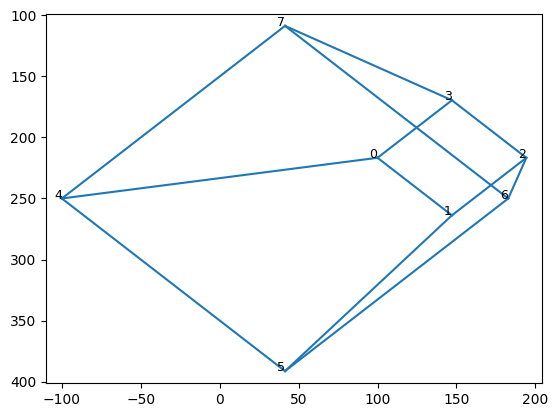

In [1]:
#number 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#importing extrinsic Matrices T and K

cTw = np.array([
    [0.707, 0.707, 0, -3],
    [-0.707, 0.707, 0, -0.5],
    [0, 0, 1, 3]
])

K = np.array([
    [100, 0, 200],
    [0, -100, 200],
    [0, 0, 1]
])

def main():

    #Vertices of the Object
    vertices = np.array([
        [0,0,0],  #0
        [2,0,0],   #1
        [2,2,0],    #2
        [0,2,0],   #3
        [0,0,-2],   #4
        [2,0,-2],    #5
        [2,2,-2],     #6
        [0,2,-2],     #7
    ])
    ones = np.ones((vertices.shape[0], 1))
    vertices = np.hstack((vertices, ones))

    #find the camera matrix using extrinsic matrices
    camera_matrix = np.dot(K,cTw)

    #put vertices into imaging pipeline
    points2d = []
    for i in vertices:
        point = np.dot(camera_matrix, i) #point in homogeneous coordinates
        point = point / point[2] #divide by 3rd element
        points2d.append(point[:2]) #only take the first two elements for the 2d point

    points2d = np.array(points2d)
    #plotting and creating the figure
    fig, ax = plt.subplots()
    
    Edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # front
    (4, 5), (5, 6), (6, 7), (7, 4),  # back
    (0, 4), (1, 5), (2, 6), (3, 7),   # #sides
    ]

    for edge in Edges:
        line = Line2D(
            [points2d[edge[0]][0], points2d[edge[1]][0]],
            [points2d[edge[0]][1], points2d[edge[1]][1]]
        )
        ax.add_line(line)
    for i, point in enumerate(points2d):
        ax.text(point[0], point[1], str(i), fontsize=9, ha='right')
    #must invert the y axis to match convention

    ax.set_xlim(min(points2d[:, 0]) - 10, max(points2d[:, 0]) + 10)
    ax.set_ylim(min(points2d[:, 1]) - 10, max(points2d[:, 1]) + 10)
    ax.invert_yaxis()
    plt.show()


    
if __name__ == "__main__": 
    main()


In [5]:
#Number 3
ctw = np.array([
    -3, -0.5, 3
])
cRw = np.array([
    [0.707, 0.707, 0],
    [-0.707, 0.707, 0],
    [0, 0, 1]
])

wtc = -np.dot(np.linalg.inv(cRw), ctw)
print(wtc)

[ 1.76803395  2.47524752 -3.        ]


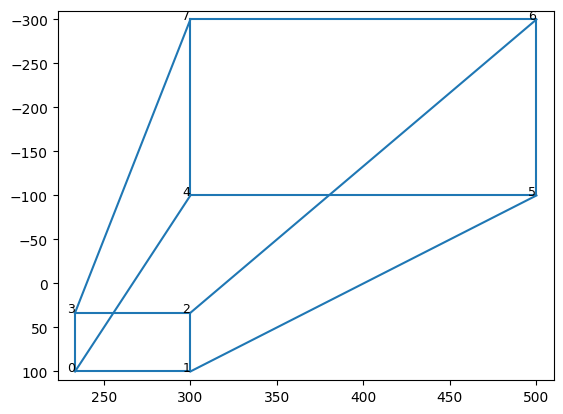

In [8]:
#number 4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#importing extrinsic Matrices T and K

cTw = np.array([
    [1, 0, 0, 1],
    [0, 1, 0,3],
    [0, 0, 1, 3]
])

K = np.array([
    [100, 0, 200],
    [0, -100, 200],
    [0, 0, 1]
])

def main():

    #Vertices of the Object
    vertices = np.array([
        [0,0,0],  #0
        [2,0,0],   #1
        [2,2,0],    #2
        [0,2,0],   #3
        [0,0,-2],   #4
        [2,0,-2],    #5
        [2,2,-2],     #6
        [0,2,-2],     #7 
    ])
    ones = np.ones((vertices.shape[0], 1))
    vertices = np.hstack((vertices, ones))

    #find the camera matrix using extrinsic matrices
    camera_matrix = np.dot(K,cTw)

    #put vertices into imaging pipeline
    points2d = []
    for i in vertices:
        point = np.dot(camera_matrix, i) #point in homogeneous coordinates
        point = point / point[2] #divide by 3rd element
        points2d.append(point[:2]) #only take the first two elements for the 2d point

    points2d = np.array(points2d)
    #plotting and creating the figure
    fig, ax = plt.subplots()
    
    Edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # front
    (4, 5), (5, 6), (6, 7), (7, 4),  # back
    (0, 4), (1, 5), (2, 6), (3, 7),   # #sides 
    ]

    for edge in Edges:
        line = Line2D(
            [points2d[edge[0]][0], points2d[edge[1]][0]],
            [points2d[edge[0]][1], points2d[edge[1]][1]]
        )
        ax.add_line(line)
    for i, point in enumerate(points2d):
        ax.text(point[0], point[1], str(i), fontsize=9, ha='right')
    #must invert the y axis to match convention

    ax.set_xlim(min(points2d[:, 0]) - 10, max(points2d[:, 0]) + 10)
    ax.set_ylim(min(points2d[:, 1]) - 10, max(points2d[:, 1]) + 10)
    ax.invert_yaxis()
    plt.show()


    
if __name__ == "__main__": 
    main()
